In [0]:
%matplotlib inline


Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



### Importing Libraries

In [3]:
#connect google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls

In [0]:
import os
os.chdir('drive/My Drive/EVA4/assignment7')

In [5]:
!ls

 augmentation.py     dataloader.ipynb   __init__.py   S7.ipynb
'Copy of S7.ipynb'   dataset.py         model.py      training.py
 data		     final.ipynb        __pycache__


In [6]:
!pwd

/content/drive/My Drive/EVA4/assignment7


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

from augmentation import Augmentation
from dataset import Data
from model import Net 
from training import train, test

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



### Downloading dataset

### Dataset and Creating Train/Test Split

In [8]:
Data = Data()
trainset = Data.getDataSet(train = True)
testset = Data.getDataSet(train = False)

Files already downloaded and verified
Files already downloaded and verified


### Dataloader Arguments & Test/Train Dataloaders

In [0]:
train_loader = Data.getDataLoader(trainset)
test_loader = Data.getDataLoader(testset)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Let us show some of the training images, for fun.



plane   dog  deer  deer


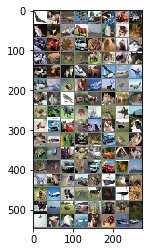

In [10]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



### Model Parameters

In [11]:
dropout_value = 0.1

# !pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
netobj = Net(dropout_value=0.1)
model = netobj.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]          73,728
             ReLU-10          [-1, 128, 32, 32]               0
      BatchNorm2d-11          [-1, 128, 32, 32]             256
          Dropout-12          [-1, 128, 32, 32]               0
           Conv2d-13           [-1, 32, 32, 32]           4,096
        MaxPool2d-14           [-1

### Training and Testing Loss

In [0]:
from training import train_losses, test_losses, train_acc, test_acc

In [13]:
from torch.optim.lr_scheduler import StepLR


model =  netobj.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)


EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    # scheduler.step()
    test(model, device, test_loader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.1799888610839844 Batch_id=390 Accuracy=45.00: 100%|██████████| 391/391 [01:20<00:00,  5.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1900, Accuracy: 5688/10000 (56.88%)

EPOCH: 1


Loss=0.6335216164588928 Batch_id=390 Accuracy=63.46: 100%|██████████| 391/391 [01:20<00:00,  5.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9216, Accuracy: 6665/10000 (66.65%)

EPOCH: 2


Loss=1.061069130897522 Batch_id=390 Accuracy=69.44: 100%|██████████| 391/391 [01:20<00:00,  5.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8365, Accuracy: 7049/10000 (70.49%)

EPOCH: 3


Loss=0.6982393264770508 Batch_id=390 Accuracy=73.67: 100%|██████████| 391/391 [01:20<00:00,  5.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8163, Accuracy: 7143/10000 (71.43%)

EPOCH: 4


Loss=0.6184625029563904 Batch_id=390 Accuracy=76.55: 100%|██████████| 391/391 [01:19<00:00,  5.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7195, Accuracy: 7509/10000 (75.09%)

EPOCH: 5


Loss=0.5720202922821045 Batch_id=390 Accuracy=78.33: 100%|██████████| 391/391 [01:20<00:00,  5.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6691, Accuracy: 7713/10000 (77.13%)

EPOCH: 6


Loss=0.4105047285556793 Batch_id=390 Accuracy=80.00: 100%|██████████| 391/391 [01:20<00:00,  5.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5993, Accuracy: 7927/10000 (79.27%)

EPOCH: 7


Loss=0.5705963373184204 Batch_id=390 Accuracy=81.41: 100%|██████████| 391/391 [01:20<00:00,  5.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6479, Accuracy: 7836/10000 (78.36%)

EPOCH: 8


Loss=0.45371729135513306 Batch_id=390 Accuracy=82.35: 100%|██████████| 391/391 [01:20<00:00,  5.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5961, Accuracy: 7980/10000 (79.80%)

EPOCH: 9


Loss=0.3414781987667084 Batch_id=390 Accuracy=83.49: 100%|██████████| 391/391 [01:20<00:00,  5.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5748, Accuracy: 8083/10000 (80.83%)

EPOCH: 10


Loss=0.40562885999679565 Batch_id=390 Accuracy=84.50: 100%|██████████| 391/391 [01:20<00:00,  5.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5860, Accuracy: 8013/10000 (80.13%)

EPOCH: 11


Loss=0.6312907338142395 Batch_id=390 Accuracy=84.95: 100%|██████████| 391/391 [01:20<00:00,  5.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5614, Accuracy: 8087/10000 (80.87%)

EPOCH: 12


Loss=0.38613924384117126 Batch_id=390 Accuracy=85.72: 100%|██████████| 391/391 [01:20<00:00,  5.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5628, Accuracy: 8124/10000 (81.24%)

EPOCH: 13


Loss=0.3462802767753601 Batch_id=390 Accuracy=86.53: 100%|██████████| 391/391 [01:20<00:00,  5.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5282, Accuracy: 8246/10000 (82.46%)

EPOCH: 14


Loss=0.4702305793762207 Batch_id=390 Accuracy=86.98: 100%|██████████| 391/391 [01:20<00:00,  5.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5324, Accuracy: 8227/10000 (82.27%)

EPOCH: 15


Loss=0.38665542006492615 Batch_id=390 Accuracy=87.47: 100%|██████████| 391/391 [01:20<00:00,  5.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5200, Accuracy: 8290/10000 (82.90%)

EPOCH: 16


Loss=0.19979742169380188 Batch_id=390 Accuracy=88.09: 100%|██████████| 391/391 [01:20<00:00,  5.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5076, Accuracy: 8298/10000 (82.98%)

EPOCH: 17


Loss=0.43845343589782715 Batch_id=390 Accuracy=88.45: 100%|██████████| 391/391 [01:19<00:00,  5.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5316, Accuracy: 8238/10000 (82.38%)

EPOCH: 18


Loss=0.4060574471950531 Batch_id=390 Accuracy=88.90: 100%|██████████| 391/391 [01:20<00:00,  5.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5138, Accuracy: 8302/10000 (83.02%)

EPOCH: 19


Loss=0.4254142642021179 Batch_id=390 Accuracy=88.94: 100%|██████████| 391/391 [01:19<00:00,  5.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5279, Accuracy: 8304/10000 (83.04%)

EPOCH: 20


Loss=0.27474886178970337 Batch_id=390 Accuracy=89.87: 100%|██████████| 391/391 [01:19<00:00,  5.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5498, Accuracy: 8268/10000 (82.68%)

EPOCH: 21


Loss=0.28410646319389343 Batch_id=390 Accuracy=90.08: 100%|██████████| 391/391 [01:20<00:00,  5.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5422, Accuracy: 8285/10000 (82.85%)

EPOCH: 22


Loss=0.37645474076271057 Batch_id=390 Accuracy=90.47: 100%|██████████| 391/391 [01:20<00:00,  5.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5184, Accuracy: 8363/10000 (83.63%)

EPOCH: 23


Loss=0.23777732253074646 Batch_id=390 Accuracy=90.41: 100%|██████████| 391/391 [01:19<00:00,  5.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5432, Accuracy: 8272/10000 (82.72%)

EPOCH: 24


Loss=0.15058188140392303 Batch_id=390 Accuracy=90.90: 100%|██████████| 391/391 [01:19<00:00,  5.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5485, Accuracy: 8316/10000 (83.16%)

EPOCH: 25


Loss=0.33274954557418823 Batch_id=390 Accuracy=90.97: 100%|██████████| 391/391 [01:19<00:00,  5.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5187, Accuracy: 8372/10000 (83.72%)

EPOCH: 26


Loss=0.35909438133239746 Batch_id=390 Accuracy=91.24: 100%|██████████| 391/391 [01:20<00:00,  5.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5234, Accuracy: 8371/10000 (83.71%)

EPOCH: 27


Loss=0.27360808849334717 Batch_id=390 Accuracy=91.65: 100%|██████████| 391/391 [01:20<00:00,  5.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5517, Accuracy: 8334/10000 (83.34%)

EPOCH: 28


Loss=0.1601434201002121 Batch_id=390 Accuracy=91.92: 100%|██████████| 391/391 [01:19<00:00,  5.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5627, Accuracy: 8270/10000 (82.70%)

EPOCH: 29


Loss=0.22098302841186523 Batch_id=390 Accuracy=91.92: 100%|██████████| 391/391 [01:20<00:00,  5.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5555, Accuracy: 8318/10000 (83.18%)

EPOCH: 30


Loss=0.25364941358566284 Batch_id=390 Accuracy=92.39: 100%|██████████| 391/391 [01:19<00:00,  5.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5542, Accuracy: 8331/10000 (83.31%)

EPOCH: 31


Loss=0.3295868933200836 Batch_id=390 Accuracy=92.57: 100%|██████████| 391/391 [01:20<00:00,  5.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5682, Accuracy: 8283/10000 (82.83%)

EPOCH: 32


Loss=0.2394731342792511 Batch_id=390 Accuracy=92.64: 100%|██████████| 391/391 [01:19<00:00,  5.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5490, Accuracy: 8379/10000 (83.79%)

EPOCH: 33


Loss=0.16259601712226868 Batch_id=390 Accuracy=92.90: 100%|██████████| 391/391 [01:19<00:00,  5.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5651, Accuracy: 8330/10000 (83.30%)

EPOCH: 34


Loss=0.11239375919103622 Batch_id=390 Accuracy=93.35: 100%|██████████| 391/391 [01:19<00:00,  5.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5756, Accuracy: 8338/10000 (83.38%)

EPOCH: 35


Loss=0.16711978614330292 Batch_id=390 Accuracy=93.07: 100%|██████████| 391/391 [01:20<00:00,  5.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5321, Accuracy: 8412/10000 (84.12%)

EPOCH: 36


Loss=0.21585360169410706 Batch_id=390 Accuracy=93.45: 100%|██████████| 391/391 [01:20<00:00,  5.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5320, Accuracy: 8450/10000 (84.50%)

EPOCH: 37


Loss=0.15218526124954224 Batch_id=390 Accuracy=93.44: 100%|██████████| 391/391 [01:20<00:00,  5.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5604, Accuracy: 8388/10000 (83.88%)

EPOCH: 38


Loss=0.15785229206085205 Batch_id=390 Accuracy=93.64: 100%|██████████| 391/391 [01:19<00:00,  5.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5404, Accuracy: 8407/10000 (84.07%)

EPOCH: 39


Loss=0.1204252690076828 Batch_id=390 Accuracy=94.01: 100%|██████████| 391/391 [01:19<00:00,  5.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5561, Accuracy: 8423/10000 (84.23%)

EPOCH: 40


Loss=0.23106232285499573 Batch_id=390 Accuracy=93.99: 100%|██████████| 391/391 [01:20<00:00,  5.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5886, Accuracy: 8368/10000 (83.68%)

EPOCH: 41


Loss=0.17017510533332825 Batch_id=390 Accuracy=94.14: 100%|██████████| 391/391 [01:20<00:00,  5.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5372, Accuracy: 8500/10000 (85.00%)

EPOCH: 42


Loss=0.11800600588321686 Batch_id=390 Accuracy=94.32: 100%|██████████| 391/391 [01:20<00:00,  5.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5642, Accuracy: 8394/10000 (83.94%)

EPOCH: 43


Loss=0.25996971130371094 Batch_id=390 Accuracy=94.61: 100%|██████████| 391/391 [01:20<00:00,  5.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5639, Accuracy: 8422/10000 (84.22%)

EPOCH: 44


Loss=0.09916471689939499 Batch_id=390 Accuracy=94.37: 100%|██████████| 391/391 [01:19<00:00,  5.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5721, Accuracy: 8414/10000 (84.14%)

EPOCH: 45


Loss=0.1080780029296875 Batch_id=390 Accuracy=94.54: 100%|██████████| 391/391 [01:19<00:00,  5.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5779, Accuracy: 8435/10000 (84.35%)

EPOCH: 46


Loss=0.2719835340976715 Batch_id=390 Accuracy=94.66: 100%|██████████| 391/391 [01:20<00:00,  5.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5909, Accuracy: 8358/10000 (83.58%)

EPOCH: 47


Loss=0.2345496118068695 Batch_id=390 Accuracy=94.81: 100%|██████████| 391/391 [01:19<00:00,  5.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5677, Accuracy: 8475/10000 (84.75%)

EPOCH: 48


Loss=0.19107887148857117 Batch_id=390 Accuracy=95.03: 100%|██████████| 391/391 [01:20<00:00,  5.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5569, Accuracy: 8452/10000 (84.52%)

EPOCH: 49


Loss=0.14221446216106415 Batch_id=390 Accuracy=95.01: 100%|██████████| 391/391 [01:19<00:00,  5.54it/s]



Test set: Average loss: 0.5861, Accuracy: 8469/10000 (84.69%)



Text(0, 0.5, 'Accuracy')

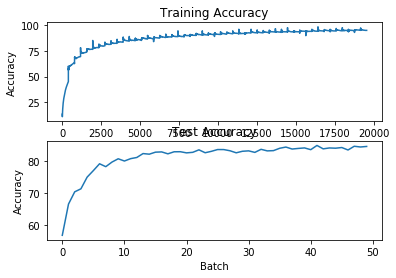

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(train_acc)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[1].set_ylabel("Accuracy")

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



GroundTruth:  plane plane horse   car


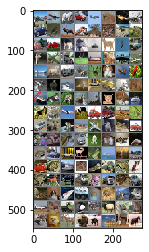

In [20]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = model(images.cuda())

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [22]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  plane plane horse   car


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [23]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images.cuda())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.cuda()).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 84 %


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [24]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 88 %
Accuracy of   car : 100 %
Accuracy of  bird : 76 %
Accuracy of   cat : 74 %
Accuracy of  deer : 84 %
Accuracy of   dog : 76 %
Accuracy of  frog : 84 %
Accuracy of horse : 93 %
Accuracy of  ship : 100 %
Accuracy of truck : 89 %
